## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

In [ ]:
# здесь и дальше -- подргрузка датасета из kaggle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [ ]:
# загружаем датасет
! kaggle datasets download -d uciml/human-activity-recognition-with-smartphones

 65% 16.0M/24.5M [00:00<00:00, 78.8MB/s]
100% 24.5M/24.5M [00:00<00:00, 97.0MB/s]


In [ ]:
!unzip *.zip

Archive:  human-activity-recognition-with-smartphones.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [ ]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [ ]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [ ]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [ ]:
# проверим количество нулевых значений по столбцам для test и train
test.isna().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [ ]:
train.isna().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

Пропусков в данных нет

In [ ]:
# проверяем дубликаты в train и test
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

Дублей в данных тоже нет

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [ ]:
# с помощью метода describe выводим основные статистики
train.describe()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.543884,-0.727735,0.678505,-0.468604,-0.847963,-0.489547,0.058593,-0.056515,-0.128562,17.413085
std,0.477653,0.315832,0.508656,0.544547,0.233633,0.511807,0.297480,0.279122,0.403686,8.975143
min,-1.000000,-0.999889,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.931208,1.000000
25%,-0.983282,-0.991595,0.804270,-0.936219,-0.999480,-0.812065,-0.017885,-0.143414,-0.486841,8.000000
50%,-0.883371,-0.950268,0.926693,-0.881637,-0.986582,-0.709417,0.182071,0.003181,-0.163271,19.000000
75%,-0.106892,-0.474625,0.965095,-0.017129,-0.764508,-0.509079,0.248353,0.107659,0.155112,26.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.478157,1.000000,1.000000,30.000000


В обучающей выборке в основном почти все параметры определены от -1 до 1, причем большинство значений, как правило, выпадает на минусовые значения, как и среднее почти для всех категорий данных (исключения -- tGravityAcc-min()-X и angle(Y,gravityMean)). Стандартное отклонение редко превосходит 0.5, но все же оно не очень маленькое в некоторых случаях, что говорит о больших разбросах в данных.


In [ ]:
test.describe()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,-0.559043,-0.735661,0.696878,-0.462063,-0.880361,-0.513923,0.074886,-0.048720,-0.154042,12.986427
std,0.439539,0.282074,0.502873,0.523916,0.160496,0.509205,0.324300,0.241467,0.392203,6.950984
min,-0.998936,-1.000000,-0.756774,-0.952357,-0.999989,-0.984195,-0.913704,-0.949228,-1.000000,2.000000
25%,-0.978433,-0.989078,0.836787,-0.934447,-0.999330,-0.829722,0.022140,-0.098485,-0.497070,9.000000
50%,-0.861830,-0.914698,0.934930,-0.852659,-0.979336,-0.729648,0.181563,-0.010671,-0.202050,12.000000
75%,-0.149596,-0.486423,0.970871,-0.009965,-0.799113,-0.545939,0.260252,0.092373,0.140254,18.000000
max,0.479547,0.117606,0.996148,0.786436,0.048730,0.833180,1.000000,0.973113,0.960367,24.000000


В тестовой выборке некоторые параметры определены не от -1 до 1: в некоторых случах (например, fBodyAcc-bandsEnergy()-1,8.2)	верхняя граница сильно ниже 1, в некоторых (например, tGravityAcc-min()-X) нижняя граница далека от -1. Причем в обучающей выборке максимальное значение параметра angle(Y,gravityMean) было меньше 0.5, а в тестовой -- 1.
Если рассматривать средние значения, то, как и в случае с обучающей выборкой, почти всегда среднее отрицательное. Стандартное отклонение скорее меньше во многих случах, но также есть значения больше 0.5. В целом данные разбросаны сильно по диапазону.  

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [ ]:
# находим, сколько раз встречается самая большая категория в обучающей выборке
max_tr = max(train['Activity'].value_counts())
# сколько раз встречается самая маленькая
min_tr = min(train['Activity'].value_counts())
# считаем отношение минимальной к максимальной и умножаем на 100
pr = (min_tr / max_tr) * 100
# выводим 100 - найденное значение
round(100 - pr)

30

In [ ]:
# то же самое для тестовой выборки
max_ts = max(test['Activity'].value_counts())
min_ts = min(test['Activity'].value_counts())
ps = (min_ts / max_ts) * 100
round(100 - ps)

22

В целом данные сбалансированы, хотя для обучающей выборки значение разности между самой крупной и самой маленькой категорией очень близко к 30%, в тестовой выборке с балансом лучше: разница между самой крупной и самой маленькой категорией меньше 22%.


### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [ ]:
# делаем из категориальной переменной (таргета -- типа активности) численный признак
# чтобы посчитать корреляции
# one-hot encoding
X_dum_tr = pd.get_dummies(train)

In [ ]:
# выводим корреляции
X_dum_tr.corr()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity_LAYING,Activity_SITTING,Activity_STANDING,Activity_WALKING,Activity_WALKING_DOWNSTAIRS,Activity_WALKING_UPSTAIRS
tBodyAccMag-mean(),1.000000,0.899080,0.369962,0.959827,0.697832,-0.370849,0.495561,0.426283,0.379796,-0.073652,-0.396643,-0.396389,-0.414460,0.358825,0.561344,0.405434
tBodyGyroJerk-mad()-X,0.899080,1.000000,0.380118,0.879900,0.507939,-0.382246,0.478567,0.380967,0.266002,-0.110321,-0.386730,-0.379403,-0.370699,0.531695,0.445048,0.257524
tGravityAcc-min()-X,0.369962,0.380118,1.000000,0.380404,0.239088,-0.988663,0.797116,0.667415,-0.261676,-0.042371,-0.973167,0.187055,0.262354,0.234820,0.192409,0.159741
tBodyAcc-max()-X,0.959827,0.879900,0.380404,1.000000,0.613383,-0.384192,0.480229,0.405023,0.335708,-0.055633,-0.394745,-0.387297,-0.399861,0.298526,0.658369,0.347429
"fBodyAcc-bandsEnergy()-1,8.2",0.697832,0.507939,0.239088,0.613383,1.000000,-0.213318,0.363170,0.423927,0.260316,-0.037000,-0.287395,-0.276766,-0.296141,0.189834,0.217399,0.534750
"angle(X,gravityMean)",-0.370849,-0.382246,-0.988663,-0.384192,-0.213318,1.000000,-0.783848,-0.643655,0.265523,0.026137,0.956927,-0.181082,-0.266279,-0.233903,-0.222029,-0.116118
"angle(Y,gravityMean)",0.495561,0.478567,0.797116,0.480229,0.363170,-0.783848,1.000000,0.594885,-0.046213,-0.009829,-0.816776,-0.096667,0.241314,0.243434,0.186124,0.310982
"angle(Z,gravityMean)",0.426283,0.380967,0.667415,0.405023,0.423927,-0.643655,0.594885,1.000000,-0.183815,-0.098712,-0.678385,-0.065389,0.167701,0.198901,0.162849,0.273889
fBodyAcc-skewness()-X,0.379796,0.266002,-0.261676,0.335708,0.260316,0.265523,-0.046213,-0.183815,1.000000,0.019742,0.206542,-0.223813,-0.419856,0.024511,0.176759,0.277785
subject,-0.073652,-0.110321,-0.042371,-0.055633,-0.037000,0.026137,-0.009829,-0.098712,0.019742,1.000000,0.028078,0.029473,0.018212,-0.047385,-0.014201,-0.019371


В обучающей выборке:

Корреляция целевой переменной с другими параметрами не очень велика почти во всех случаях: большинство значение по модулю меньше 0.5. Это можно объяснить тем, что для определения целевой переменной важен не какой-то один признак, а их комбинация со сложными коэффициентами. Хотя не везде это так: например, для Laying и tGravityAcc-min()-X, а также angle(X,gravityMean) кожффициент корреляции очень близок к -1 и 1 соответственно.

Сами признаки между собой коррелируют тоже не очень сильно, хотя есть и очень заметные зависимости: корреляция tBodyAccMag-mean() и tBodyAcc-max()-X очень близка к единице. Такое высокое значение, наверное, достигается из-за того, что эти две величины взаимосвязаны: усредненная величина ускорения тела и максимальная величина ускорения тела по оси Х.

Очевидно, что наименьшая корреляция наблюдается с переменной "subject": она указывает лишь порядковый номер участника.

In [ ]:
X_dum_ts = pd.get_dummies(test)

In [ ]:
X_dum_ts.corr()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity_LAYING,Activity_SITTING,Activity_STANDING,Activity_WALKING,Activity_WALKING_DOWNSTAIRS,Activity_WALKING_UPSTAIRS
tBodyAccMag-mean(),1.000000,0.934773,0.407084,0.965114,0.767875,-0.400871,0.439051,0.425011,0.365670,-0.057359,-0.432375,-0.401367,-0.414812,0.382256,0.533885,0.399410
tBodyGyroJerk-mad()-X,0.934773,1.000000,0.393773,0.898628,0.625414,-0.387274,0.423288,0.368411,0.278765,-0.079811,-0.409460,-0.395664,-0.379256,0.522026,0.464393,0.255742
tGravityAcc-min()-X,0.407084,0.393773,1.000000,0.386764,0.301643,-0.989043,0.697006,0.633881,-0.237864,0.004927,-0.983505,0.196159,0.244371,0.227835,0.193024,0.163337
tBodyAcc-max()-X,0.965114,0.898628,0.386764,1.000000,0.707129,-0.384454,0.410477,0.398008,0.338543,-0.071786,-0.407889,-0.396788,-0.408003,0.281951,0.638335,0.364582
"fBodyAcc-bandsEnergy()-1,8.2",0.767875,0.625414,0.301643,0.707129,1.000000,-0.279783,0.327473,0.446245,0.293881,-0.090817,-0.342430,-0.295023,-0.323854,0.213190,0.270809,0.524637
"angle(X,gravityMean)",-0.400871,-0.387274,-0.989043,-0.384454,-0.279783,1.000000,-0.668108,-0.615114,0.235208,0.003138,0.966505,-0.203741,-0.240721,-0.229489,-0.218656,-0.115408
"angle(Y,gravityMean)",0.439051,0.423288,0.697006,0.410477,0.327473,-0.668108,1.000000,0.425454,-0.087006,-0.047553,-0.725073,-0.058690,0.200925,0.193011,0.160255,0.262663
"angle(Z,gravityMean)",0.425011,0.368411,0.633881,0.398008,0.446245,-0.615114,0.425454,1.000000,-0.208121,0.055885,-0.649058,-0.043474,0.109366,0.166195,0.164282,0.286753
fBodyAcc-skewness()-X,0.365670,0.278765,-0.237864,0.338543,0.293881,0.235208,-0.087006,-0.208121,1.000000,0.015103,0.224384,-0.274466,-0.411989,0.034471,0.237610,0.213281
subject,-0.057359,-0.079811,0.004927,-0.071786,-0.090817,0.003138,-0.047553,0.055885,0.015103,1.000000,0.019262,0.017383,0.021736,-0.042317,-0.006886,-0.011007


На тестовой выборке корреляции очень схожи. Также в основном для целелевой переменной значения не превосходят по модулю 0.5 (хотя высокая степень корреляции laying с некоторыми переменнами сохраняется). Вероятно, при обучении необходимо будет учитывать комбинации признаков, чтобы улучшить качество модели.

Касательно других корреляций, параметры в тестовой выборке коррелируют между собой примерно так же, как и в обучающей выборке. По крайней мере, тенденции видны схожие.

Наконец, параметр subject также мало значим: это всего лишь порядковый номер, мы и не ожидаем увидеть с ним корреляцию.

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

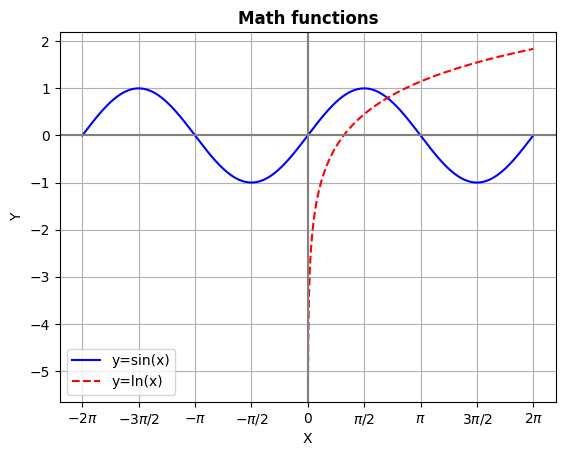

In [ ]:
# создаем график синуса: генерируем много значений от -2 пи до 2 пи, подставляем в функцию
x_sin = np.arange(-2*np.pi, 2*np.pi, 0.01)
y_sin = np.sin(x_sin)

# то же самое с логарифмом: значения от 0.005 до 2 пи, подставляем в функцию логарифма
x_log = np.arange(0.005, 2*np.pi, 0.001)
y_log = np.log(x_log)

# строим график для синуса, синего цвета, присваиваем ему название
plt.plot(x_sin, y_sin, color='blue', label='y=sin(x)')

# строим график для логарифма, красного цвета, подчеркиваниями, добавляем название
plt.plot(x_log, y_log, color='red', linestyle='--', label='y=ln(x)')

# делаем деления на оси от -2пи до 2пи с шагом пи/2
plt.gca().set_xticks(np.arange(-2*np.pi, 2*np.pi+0.01, np.pi/2))
# меняем некрасивые числа на красивую запись с числом пи
labels = [r'$-2\pi$', r'$-3\pi/2$', r'$-\pi$', r'$-\pi/2$', r'0',
          r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']
# добавляем эти названия к графику
plt.gca().set_xticklabels(labels)

# задаем шкалу по игрику: от -5 до 2 (включит), с шагом 1
plt.yticks(np.arange(-5, 2.01, 1))

# добавляем вспомогательные оси (начало координат)
plt.axvline(x = 0, color = 'gray')
plt.axhline(y = 0, color = 'gray')

# добавляем название графика, жирным текстом
plt.title('Math functions', weight='bold')

# добавляем названия осей
plt.xlabel('X')
plt.ylabel('Y')

# добавляем влево вниз легенду
plt.legend(loc='lower left')

# добавляем клеточки
plt.grid()

# выводим график
plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

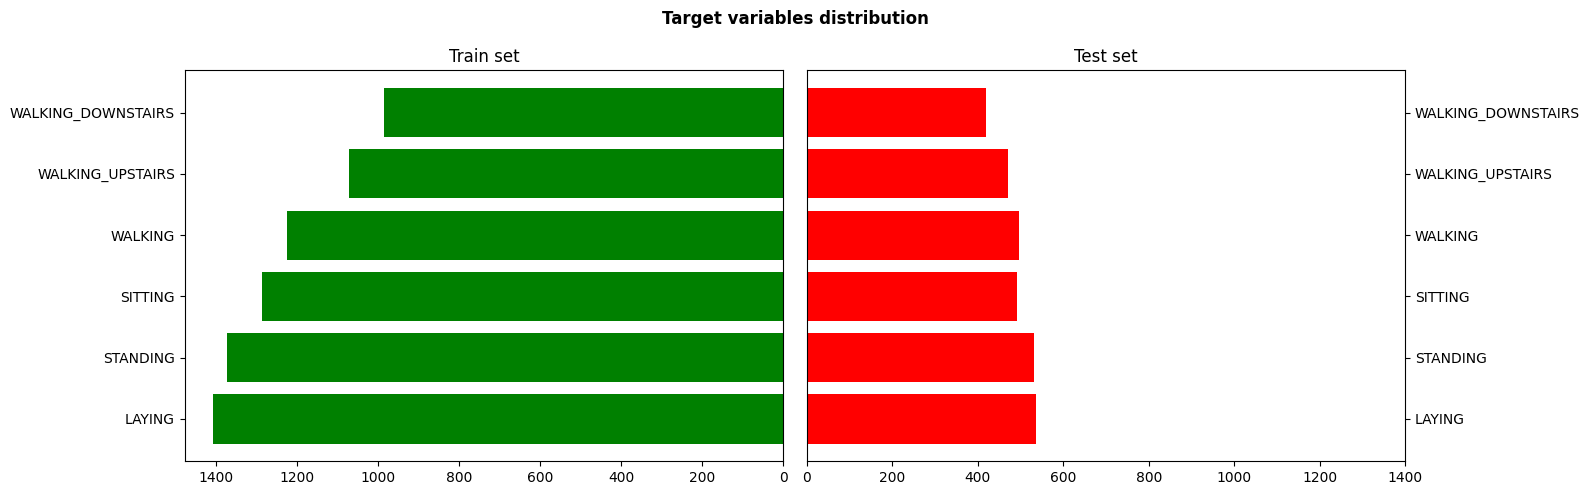

In [ ]:
# создаем словарь для данных из обучающей выборки: значение целевой переменной
# и количество в выборке таких значений
counts_tr = dict(train['Activity'].value_counts())
# в эти списки добавим последовательно количества и значения
x_tr = []
y_tr = []
# проходимся по каждому значению и добавляем в списки
for count in counts_tr:
    x_tr.append(counts_tr[count])
    y_tr.append(count)

# то же самое для тестовой выборки
counts_ts = dict(test['Activity'].value_counts())
x_ts = []
y_ts = []
# только чтобы сохранить порядок идем в том же, что получился для обучающей
for y in y_tr:
    x_ts.append(counts_ts[y])
    y_ts.append(y)

# создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# создаем первый подграфик
# горизонтальная гистограмма зеленого цвета для обучающей выборки
ax1.barh(y_tr, x_tr, color='green')
# добавляем на ось икс цифры: от 0 до максимума с шагом в 200
ax1.set_xticks(range(0, max(x_tr), 200))
# инвертируем ось
ax1.invert_xaxis()
# добавляем название подграфику
ax1.set_title('Train set')

# создаем второй подграфик
# горизонатльная гистоаграмма красного цвета для тестовой выборки
ax2.barh(y_ts, x_ts, color='red')
# такие же значение на оси х
ax2.set_xticks(range(0, max(x_tr), 200))
# убираем названия на оси у направо
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
# добавляем название подграфику
ax2.set_title('Test set')

# добавляем общее название для графика
fig.suptitle('Target variables distribution', weight='bold')

# выводим подграфики поближе друг к другу
fig.tight_layout()

# выводим получившееся
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

Исключаем признак 'subject', потому что он отвечает только за порядковый номер участника наблюдений. Он точно не связан с целевой переменной и не влияет на нее. Кроме того, в табличках с корреляциями выше мы убедились в незначимости этого признака: почти все корреляции с ним близки к нулю.

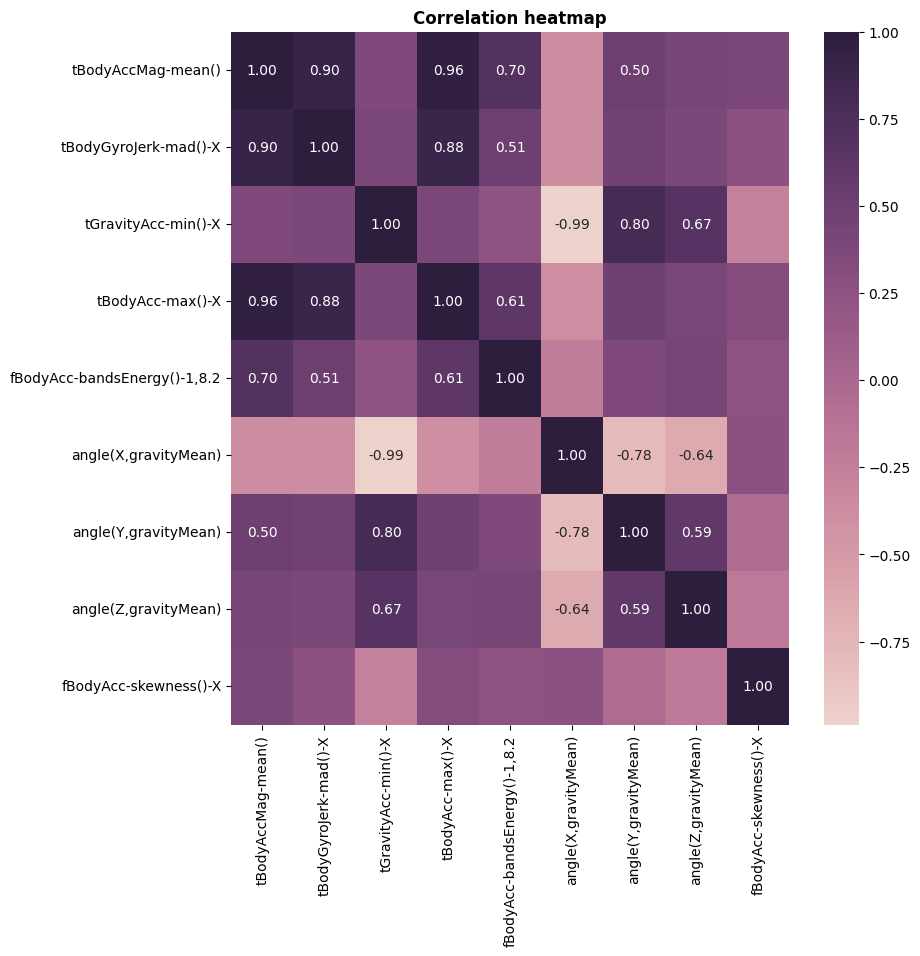

In [ ]:
# настраиваем размер графика
fig, ax = plt.subplots(figsize=(9, 9))

# задаем параметры пострения
# смотрим на все колонки, кроме subject
# устанавливаем палетку, добавляем аннотации, округленные до двух знаков после запятой
ax = sns.heatmap(train.drop(['subject'], axis=1).corr(),
                 cmap=sns.cubehelix_palette(as_cmap=True), annot=True,
                 fmt="0.2f")
# добавляем заголовок
ax.set_title('Correlation heatmap', weight='bold')
# фильтруем аннотации: оставляем только значимые (по модулю больше или равные 0.5)
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

По такой heatmap можно лучше отметить корреляции, которые было сложно найти, исходя лишь из данных таблицы. Так, есть признаки, которые коррелируют между собой очень сильно: angle(X, gravityMean) и tGravityAcc-min()-X: коэффициет их корреляции очень близок к -1. Большинство сильных, значимых корреляций положительные, хотя есть и два отрицательных выделенных значени на графике.

Ради интереса построю такой же график с учетом таргета.

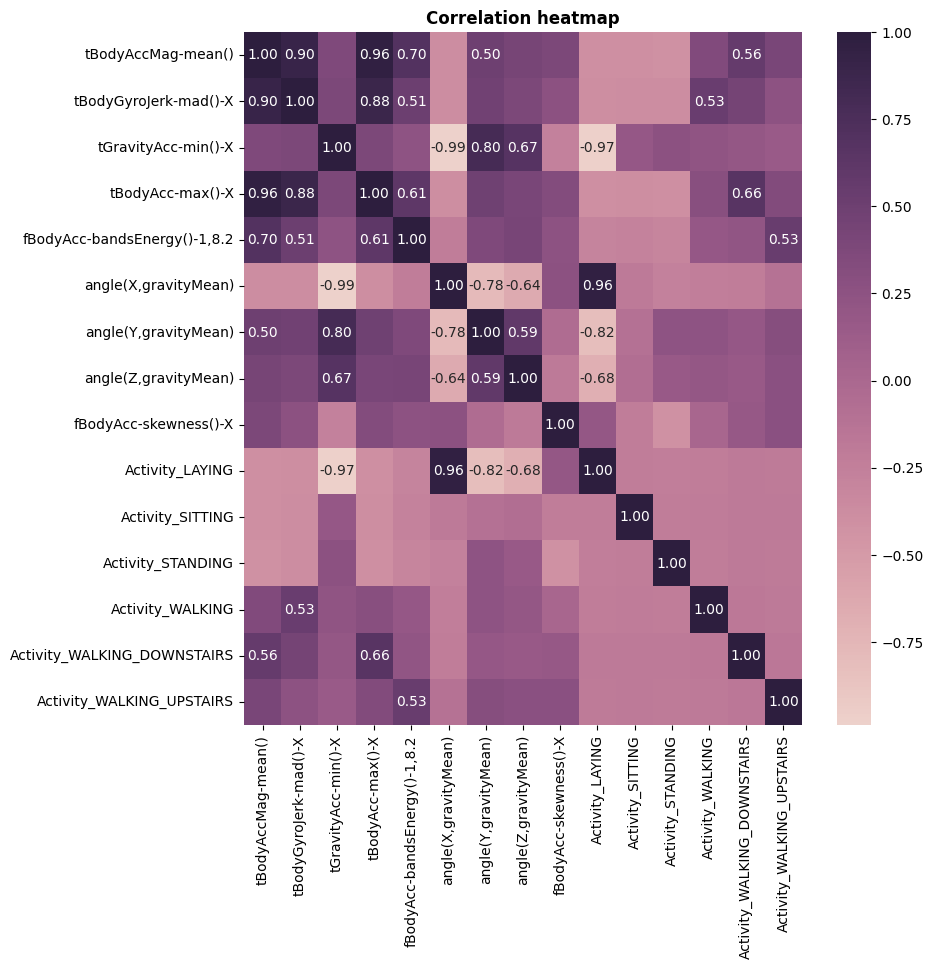

In [ ]:
# настраиваем размер графика
fig, ax = plt.subplots(figsize=(9, 9))

# задаем параметры пострения
# смотрим на все колонки, кроме subject
# устанавливаем палетку, добавляем аннотации, округленные до двух знаков после запятой
ax = sns.heatmap(X_dum_tr.drop(['subject'], axis=1).corr(),
                 cmap=sns.cubehelix_palette(as_cmap=True), annot=True,
                 fmt="0.2f")
# добавляем заголовок
ax.set_title('Correlation heatmap', weight='bold')
# фильтруем аннотации: оставляем только значимые (по модулю больше или равные 0.5)
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Как и было видно из таблицы, для laying видны наибольшие корреляции: с tGravityAcc-min()-X, fBodyAcc-bandsEnergy()-1,8.2. Также значимы angle(Y, gravityMean) и angle(Z, gravityMean). Для других признаков сложно выделить значимые корреляции (лишь для некоторых типов ходьбы находятся корреляции от 0.53 до 0.66), что в очередной раз доказывает значимость совокупности признаков для определения значения целевой переменной.

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

In [ ]:
sns.pairplot(train)

Жуть какая-то получилась.. :)

Есть что-то похожее немного на линейные зависимости (например, angle(X,gravityMean) и tGravityAcc-min()-X), но такие зависимости видны были и из таблицы корреляции (близкое по модулю к 1 значение).

Также заметно, что в некоторых категориях некоторых значений сильно больше (например, в tBodyAccMag-mean(), как и во многих других категориях, сильный переклон в -1).

Некоторые штуки вообще непонятно как распределены: ни линейной, ни квадратной и т.д. зависимости. Например, для fBodyAcc-skewness()-X часто точечки распределены чуть ли не по всему квадртау.

В очередной раз можно убедиться в незначимости признака subject: это просто линии со значениями для каждого участника исследований. Очевидно, что они немного разные, но для некоторых признаков распределены достаточно схоже (например, tBodyAcc-max()-X).

Есть некоторые нелинейные, но очень интересные зависимочти (angle(Y, gravityMean) и tBodyGyrojerk-mad()-X). Вообще для angle(Y, gravityMean) получаются похожие *кракозябры* почти со всеми признаками, но они не описываются линейной зависимостью, поэтому не видны в таблице с корреляциями.

*(а вообще сложно-сложно такое анализировать, я лучше дальше напишу что-нибудь помудрее :)(()*

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

Text(0.5, 1.0, 'Mean body acceleration for activities')

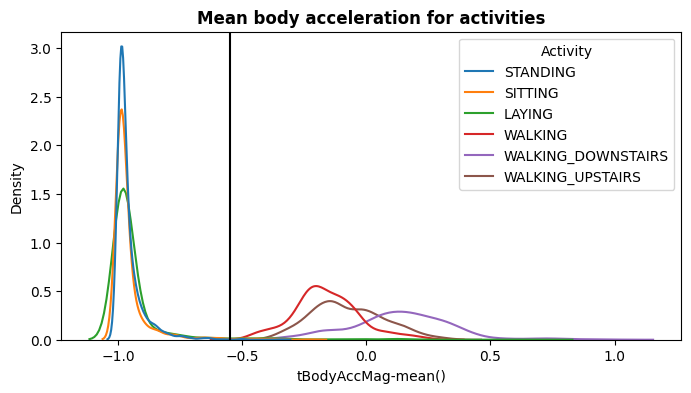

In [ ]:
# задаем размер графика
fig, ax = plt.subplots(figsize=(8, 4))
# создаем график: рисуем линии в зависимости от того, к какой активности относится
# то или иное значение параметра
ax = sns.kdeplot(data=train, x=train['tBodyAccMag-mean()'], hue='Activity')
# визуально определяем линию как x=-0.55
# если больше -0.55, то динамические, а если меньше -- статические
ax.axvline(x = -0.55, color='black')
# добавляем заголовок
ax.set_title('Mean body acceleration for activities', weight='bold')

In [ ]:
# создаем подтабличку, чтобы посчитать, насколько точно прямая разделила данные
# оставляем только переменную и значения activity
help = train[['tBodyAccMag-mean()', 'Activity']]
# в новом столбце Static будут помеченные мной значения
# больше или равно -0.55 -- динамичная, меньше -- статичная
help['Static'] = np.where(help['tBodyAccMag-mean()'] < -0.55, 1, 0)
# здесь определяем по-настоящему статичные ситуации
help['actually_static'] = np.where(((help['Activity'] == 'SITTING') |
                                   (help['Activity'] == 'STANDING') |
                                   (help['Activity'] == 'LAYING')), 1, 0)
# по-настоящему динамичные
help['actually_dynamic'] = np.where(((help['Activity'] == 'WALKING') |
                                   (help['Activity'] == 'WALKING_DOWNSTAIRS') |
                                   (help['Activity'] == 'WALKING_UPSTAIRS')), 1, 0)
# которые я определила как статичные и которые на самом деле статичные
help['right_static'] = np.where(((help['Static'] == 1) &
                                 (help['actually_static'] == 1)), 1, 0)
# которые я определила как динамичные и которые на самом деле динамичные
help['right_dynamic'] = np.where(((help['Static'] == 0) &
                                 (help['actually_dynamic'] == 1)), 1, 0)

# считаем и выводим процент правильно определенных ситуаций среди по-настоящему таких
perc_st = len(help[help['right_static'] == 1]) / len(help[help['actually_static'] == 1])

perc_dyn = len(help[help['right_dynamic'] == 1]) / len(help[help['actually_dynamic'] == 0])

print(perc_st * 100)

print(perc_dyn * 100)

98.35259404966806
80.77206786328989


В целом получилось достаточно неплохое значение для определения статичных ситуаций: 98% правильно определяются как статичные! Правда, для динамичных процент сильно ниже, но 80 -- это тоже, на мой взгляд хорошее значение.

Вероятно, признак tBodyAccMag-mean(), который означает 'усредненная величина ускорения тела', очень хорошо разделяет динамичные и статические ситуации, потому что при статичных ситуациях ускорение тела, в теории, стремится к нулю: если мы сидим, лежим или стоим, то мы не двигаемся, значит, ускорение очень близко к нулю. Для динамических ситуаций, напротив, ускорение явно отлично от нуля. Мы двигаемся, когда ходим, поднимаемся или спускаемся по лестнице, поэтому и ускорение заметно отличается от случаев, когда мы сидим, лежим или стоим.

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

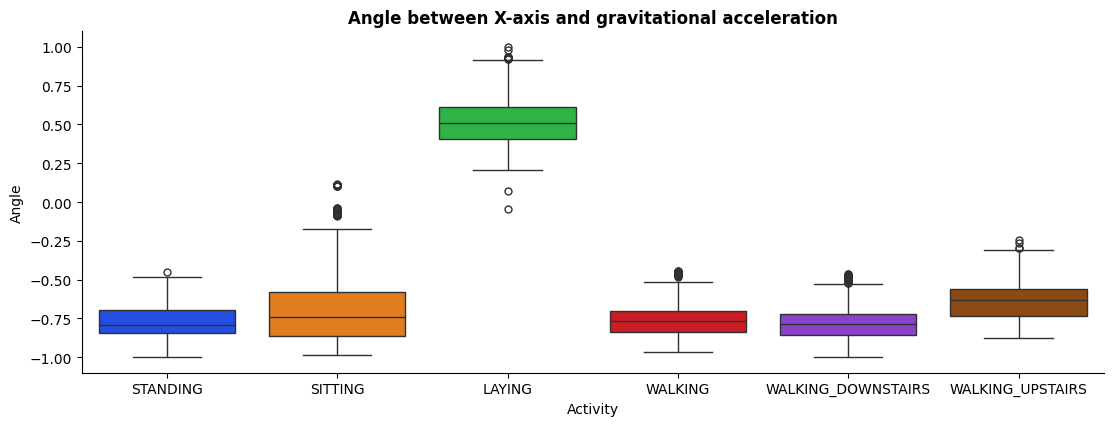

In [ ]:
# задаем график
# по оси x -- activity, y -- angle
# раскраска по activity
# в виде ящиков
cat = sns.catplot(x = 'Activity', y="angle(X,gravityMean)", hue="Activity",
                  data=train, kind="box", palette='bright')
# задаем размеры
cat.fig.set_figwidth(14)
cat.fig.set_figheight(4)

# меняем стиль на белый и добавляем засечки на осях
sns.set_style('white')
sns.set_style('ticks')

# добавляем названия осей и название графика
plt.xlabel('Activity')
plt.ylabel('Angle')
plt.title('Angle between X-axis and gravitational acceleration', weight='bold')

# выводим график
plt.show()

По этому параметру значительно выделяется категория активности "Laying". Действительно, когда мы лежим, угол между осью X и направлением гравитационного ускорения отличается от этого угла в других случаях (в остальных случаях положения тела вертикально, а не горизонтально). Основные значения этой категории находятся в промежутке от примерно 0.22, что почти однозначно отделяет ее от других категорий активности.

 Также есть выбросы у Sitting, потому что это положение также немного отличается. Например, если значение этой величины находится в промежутке от -0.25 до 0, то вероятность того, что это Sitting -- почти 100% (только некоторый выбросы Laying могут уменьшить этот процент, но если определить laying до этого, то вообще все замечательно! -- отсылка к последней задачке).

 Standing, Walking (down/upstairs) в целом показывают приблизительно одинаковые основные значения, потому что действительно в этих ситуациях положения тела схожи. Однако для walking_upstairs значение переменной в среднем несколько выше, чем для других (кроме laying и sitting). Можно сказать, что оно больше -0.65 при "отсекании" двух других уже определенных категорий -- sitting и laying (так мы получим около 25% всех результатов для walking_upstairs).

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

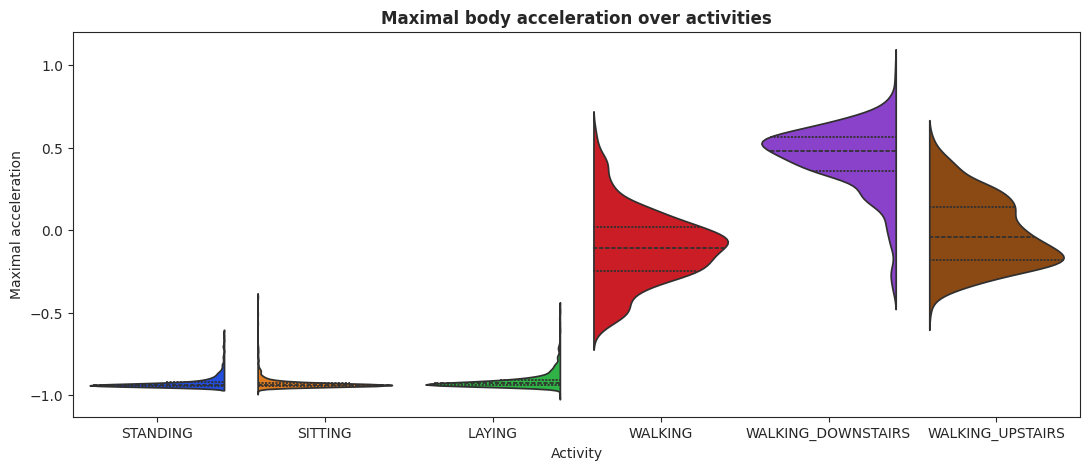

In [ ]:
# задаем размер графика
fig, violin = plt.subplots(figsize=(13, 5))
# задаем график
# по оси х -- активность, у -- максимальное ускорение
# раскраска по активности
# выводим только правую часть графика с пунктирными полосочками
violin = sns.violinplot(x='Activity', y='tBodyAcc-max()-X', data=train,
                        hue='Activity', split=True, palette='bright',
                        inner="quart")
# уменьшаем шрифт
plt.rcParams["axes.labelsize"] = 1

# добавляем название графика и названия осей
violin.set_xlabel('Activity')
violin.set_ylabel('Maximal acceleration')
violin.set_title('Maximal body acceleration over activities', weight='bold')
# выводим график
plt.show()

По этому параметру сильно отличаются динамические активности. При значении параметра от -0.5 (даже, наверное, немного меньше -- количество статических активностей немного ниже этого значения ничтожно мало) мы почти со стопроцентной уверенностью можем сказать, что это динамическая активность.

Однако среди динамических активностей наиболее отличной является Walking_downstairs. Действительно, при спуске с лестницы ускорение обычно наибольшее (для статичных активностей его вообще нет, а среди обычной ходьбы и подъеме по лестнице спуск является самым быстрым). Если задавать численные ограничения, можно сказать, что выше значения около 0.25 (примерно где отсекаются 25% от ходьбы по лестнице вниз) почти всегда будет именно эта активность.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

In [ ]:
# здесь динамические активности
train_dynamic = train[(train['Activity'] == 'WALKING') |
                      (train['Activity'] == 'WALKING_DOWNSTAIRS') |
                      (train['Activity'] == 'WALKING_UPSTAIRS')]
# здесь статические
train_static = train[(train['Activity'] == 'STANDING') |
                     (train['Activity'] == 'SITTING') |
                     (train['Activity'] == 'LAYING')]

Text(0.5, 0.98, 'Angle and Energy for activity groups')

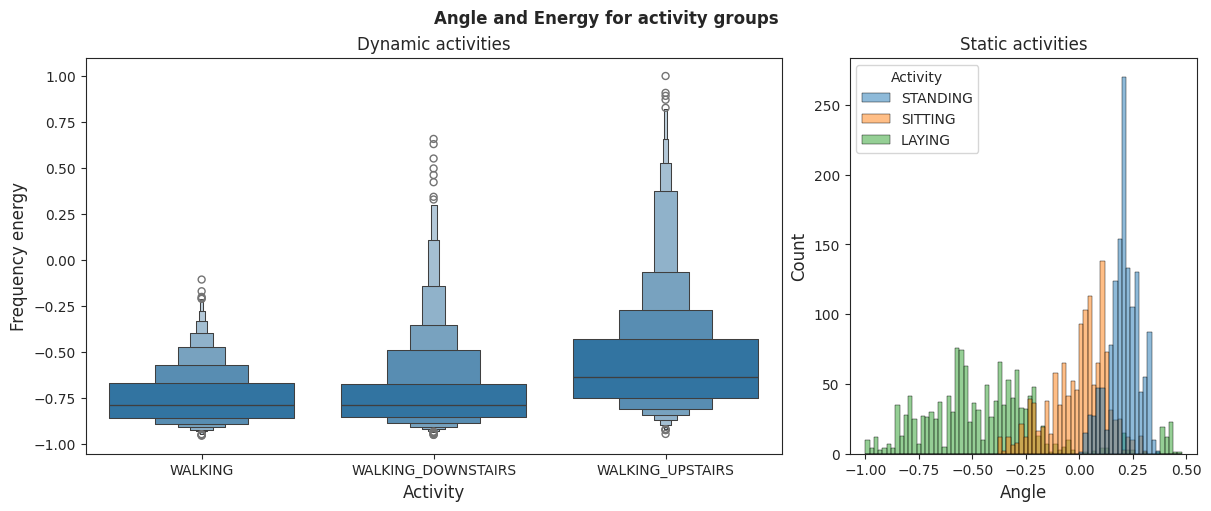

In [ ]:
# создаем фигуру
fig = plt.figure(figsize=(12, 5), constrained_layout=True)
# добавляем gridspec из 3 частей
gs = fig.add_gridspec(1, 3)
# увеличиваем шрифт
plt.rcParams["axes.labelsize"] = 12

# первый график -- две части
box = fig.add_subplot(gs[0, :2])
# добавляем название осей и название графика
box.set_xlabel('Activity')
box.set_ylabel('Frequency energy')
box.set_title('Dynamic activities')
# создаем график
# по оси х -- активность, по у -- энергия, вертикальная ориентация
box = sns.boxenplot(data=train_dynamic, x="Activity", y="fBodyAcc-bandsEnergy()-1,8.2",
                    orient='v')

# второй график -- оставшаяся третья часть
hist = fig.add_subplot(gs[0, 2:])
# добавляем названия осей и название графика
hist.set_xlabel('Angle')
hist.set_ylabel('Count')
hist.set_title('Static activities')
# создаем гистограмму, по оси х -- угол, считаем count, раскрашиваем по активности
# уменьшаем ширину колонок, добаваляем обводку
sns.histplot(data=train_static, x='angle(Y,gravityMean)', stat='count',
             hue='Activity', binwidth=0.02, edgecolor='k', linewidth=0.3)

# добавляем общее название графика
fig.suptitle('Angle and Energy for activity groups', weight='bold')

На левом графике (среди динамических ситуаций) мы видим, что просто walking распределено более компактно, чем ходьба вверх или вниз по лестнице. Значения для этой категории находятся в диапазоне от -1 до примерно -0.1. Ходьба вверх по лестнице, наоборот, показывает наибольший разброс в данных. В целом наибольшая часть значений приходится несколько выше для этой категории, чем для двух других. После примерно -0.25 вероятность того, что случайно выбранное значение будет принадлежать категории walking upstairs, растет. Рассматриваемый параметр означает 'энергия ускорения тела в интервале частоты', а она действительно несколько выше при ходьбе по лестнице, в отличие от обычной ходьбы, причем больше всего при ходьбе вверх. Таким образом, этот параметр помогает найти некую закономерность с walking_upstairs (про больше -0.25), однако для walking он показывает меньший разброс и группирует ее более компактно.

Однако если учитывать, что мы знаем что-то про walking downstairs из предыдущих заданий (мы ее определили по другому параметру -- почти 75% значений этой категории), по этому графику можно отделить walking_upstairs еще лучше: после -0.75 она встречается сильно чаще, чем просто walking.

На втором графике заметно выделяется Standing. Все значения для этой категории больше 0, причем большинство приходится на диапазон от примерно 0.13 до 0.33. Что более интересно, другие активности почти не входят в этот интервал значений. Тем самым, такие значение этого параметры почти однозначно определяют вид активности "стояния", тем самым выделяя ее. Остальные активности не показывают такой сильной корреляции, хотя для sitting мы можем сказать, что при значениях от примерно -0.2 до 0.05 почти все приходится на эту активность. Но корреляция несколько меньше, чем со standing. Такая зависимость объясняется тем, что при активности "стояния", в отличие от сидения и лежания, угол между осью Y и гравитационной составляющей ускорения больше (да и показывает меньший разброс).

Имея в виду достаточно четкое выделение laying ранее, эти ограничения можно записать еще лучше: при значении от 0.13 (0.15) почти всегда standing, а после этого -- от -0.2 почти всегда sitting!

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

In [ ]:
# создаем вспомогательный датафрейм для второго условия
static_new = train_static[train_static['fBodyAcc-skewness()-X'] < -0.376]

Text(0.5, 0.98, 'Acceleration and Angle over static activities')

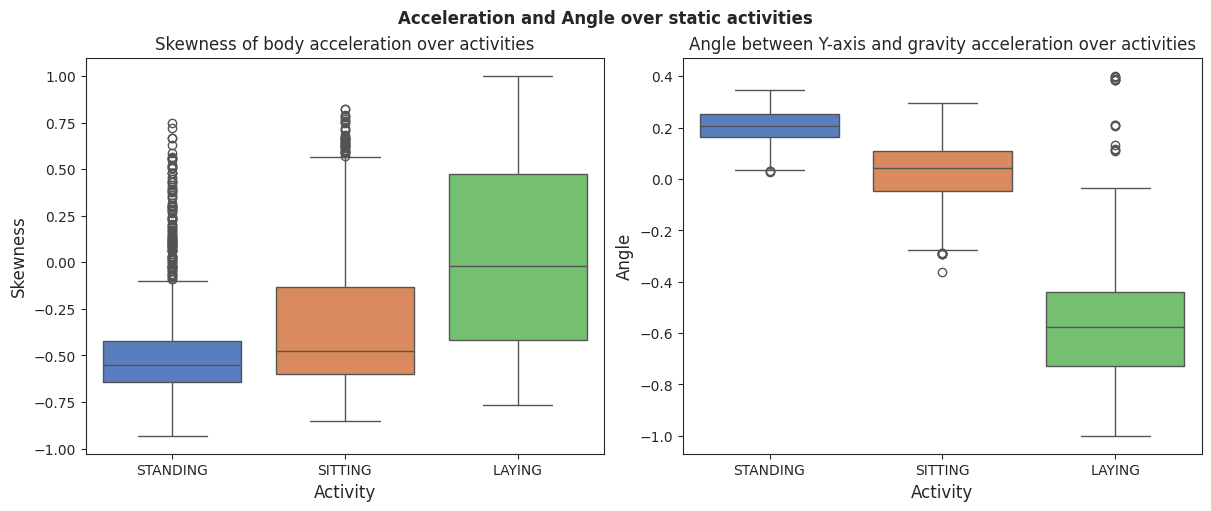

In [ ]:
# создаем фигуру и задаем рамер
fig = plt.figure(figsize=(12, 5), constrained_layout=True)
# добавляем gridspec из 3 частей
gs = fig.add_gridspec(1, 2)

# первый график -- одна часть
ax1 = fig.add_subplot(gs[0, :1])
# добавляем график
# х -- активность, у -- ассиметрия, добавляем палетку и раскрашиваем по типу активности
sns.boxplot(data=train_static, x="Activity", y="fBodyAcc-skewness()-X",
                  hue='Activity', palette='muted')
# добавляем названия осей и название графика
ax1.set_xlabel('Activity')
ax1.set_ylabel('Skewness')
ax1.set_title('Skewness of body acceleration over activities')

# добавляем втрой график
ax2 = fig.add_subplot(gs[0, 1:])
# создаем график
# х -- активность, у -- угол, добавляем палетку и раскрашиваем по типу активности
sns.boxplot(data=static_new, x="Activity", y="angle(Y,gravityMean)",
                  hue='Activity', palette='muted')
# добавляем названия осей и название графика
ax2.set_xlabel('Activity')
ax2.set_ylabel('Angle')
ax2.set_title('Angle between Y-axis and gravity acceleration over activities')

# добавляем общее название для графиков
fig.suptitle('Acceleration and Angle over static activities', weight='bold')

По первому графику нельзя ничего выделить: значения слишком пересекаются друг с другом, поэтому мы не можем однозначно (или даже с высокой вероятностью) определить, что по каким-то значениям признака мы определим объект в ту или иную категорию активности. Хотя standing и более компактен, у него есть слишком много выбросов, как и sitting, но он и вовсе не компактен. В общем, значения по этому параметру разбросаны слишком сильно, чтобы можно было выделить одну или несколько категорий.

На втором графике можно выделить некоторые активности с большим успехом. Мы видим, что больше 75% значений активности "лежания" находится при значении параметра меньше -0.4. Также можно выделить больше 75% активности standing (хотя уже не с таким же успехом, но все же..), если взять значение параметра больше 0.15. Для sitting можно выделить большую часть объектов, если значение параметра находится в диапазоне от -0.25 до 0.15 (учитывая ранее определенное laying, можно сказать, что нижнего ограничения нет).
Получается, что при значении параметра 'асимметричность частоты ускорения тела по оси Х' меньше -0.376 мы можем более-менее четко выделить категории активности для статичных активностей по параметру 'угол между осью Y и усредненной гравитационной составляющей ускорения': для лежания он сильно отличается, но сидение и стояние тоже несколько можно разграничить.

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

In [ ]:
# новый дф для второго условия
dynamic_new = train_dynamic[train_dynamic['tBodyAcc-max()-X'] < 0.157]

Text(0.5, 0.98, 'Body and gravity acceleration over dynamic activities')

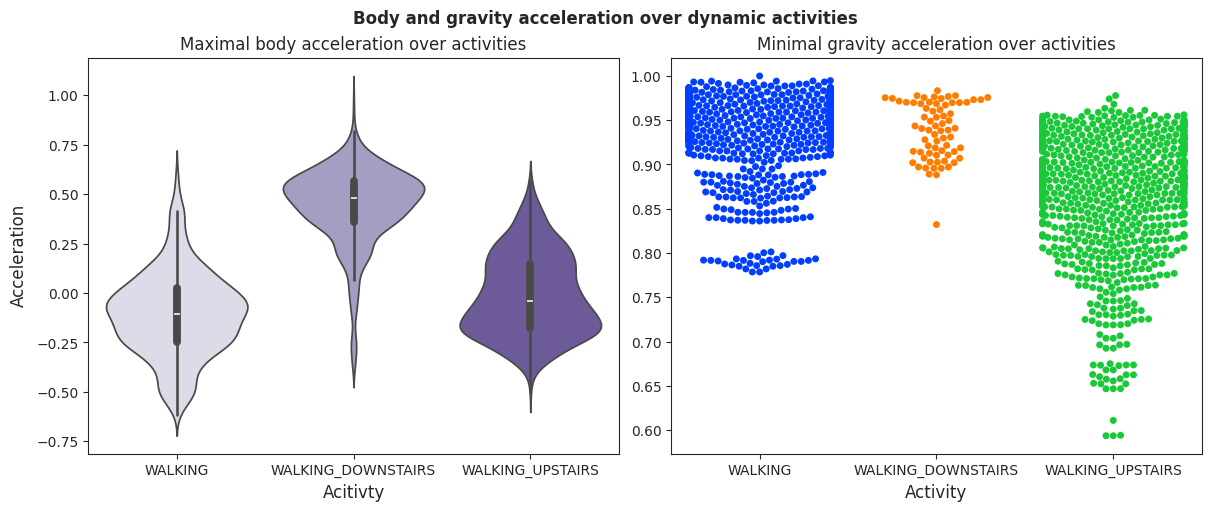

In [ ]:
# создаем фигуру и задаем рамер
fig = plt.figure(figsize=(12, 5), constrained_layout=True)
# добавляем gridspec из 3 частей
gs = fig.add_gridspec(1, 2)

# первый график -- одна часть
ax1 = fig.add_subplot(gs[0, :1])
# строим violinplot
# по х -- активность, по у -- ускорение, раскраска по ативностям
sns.violinplot(x='Activity', y='tBodyAcc-max()-X', data=train_dynamic,
               hue='Activity', palette='Purples')
# добавляем название графика и название х-оси
ax1.set_title('Maximal body acceleration over activities')
ax1.set_xlabel('Acitivty')
# удаляем название у-оси (чтобы добавить общую)
ax1.set_ylabel('')

# второй график -- вторая часть
ax2 = fig.add_subplot(gs[0, 1:])
# строим swarmplot
# по х -- активность, у -- гравитационное ускорение, раскраска по активностям
sns.swarmplot(x='Activity', y='tGravityAcc-min()-X', data=dynamic_new,
              hue='Activity', palette='bright')
# добавляем название графика и х-оси
ax2.set_xlabel('Activity')
ax2.set_title('Minimal gravity acceleration over activities')
# убираем название у-оси
ax2.set_ylabel('')

# добавляем общее название для у-оси и общее название графиков
fig.supylabel('Acceleration')
fig.suptitle('Body and gravity acceleration over dynamic activities',
             weight='bold')

Из первого графика видно, что при значениях параметра от 0.25 большинство признаков приходится на walking_downstairs (более подробно описала чуть более большой график для этого параметра в задании 11).

На втором графике мы можем точно сказать, что при значении параметра tGravityAcc-min()-X меньше 0.77 все значения приходятся на категорию walking_upstairs. Можно поднять планку и несколько выше: до примерно 0.9. Хотя в этот раз и попадут некоторые объекты из walking, их количество будет заметно меньше, чем тех, кто относится к walking upstairs. Можно проверить эту гипотезу, посчитав процент walking upstairs ниже значения 0.85.

In [ ]:
# вспомогательный дф (только две колонки, уже с нужным условием tBodyAcc-max()-X < 0.157)
new = dynamic_new[['tGravityAcc-min()-X', 'Activity']]
# в новом столбце upstairs будут помечено, согласно выбранной мной линии (<0.85),
# является ли активность 'walking upstairs'
new['upstairs'] = np.where(new['tGravityAcc-min()-X'] < 0.85, 1, 0)
# в этом столбце правильно ли определено для активности хождения вверх по лестнице
new['correct'] = np.where((new['upstairs'] == 1) & (new['Activity'] == 'WALKING_UPSTAIRS'), 1, 0)

# считаем процент правильных ко всем, которые я так определила: как раз 83 получается!
len(new[new['correct'] == 1]) / len(new[new['upstairs'] == 1])

0.8323170731707317

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [ ]:
!pip install plotly

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 6min 36s, sys: 692 ms, total: 6min 36s
Wall time: 4min 16s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [ ]:
# рисуем двумерный график
import plotly.express as px
fig = px.scatter(df_2_comp, x="x", y="y", color="Activity")
fig.show()

Явно видно, как отделяется ото всех активность laying: зеленые точки сгруппированы отдельно от всех остальных. Две диугие статичные активности тоже сгруппированы друг с другом, причем между ними тоже наблюдается некое разделение: для красных точек (sitting) характерны несколько меньшие значения, чем для синих (standing). Наконец, общий кластер формируют и динамические активности, также имея некое распределение внутри: оранжевые точки (walking downstairs) скорее ближе к laying: они выше по оси у и левее по оси х, фиолетовые точки (walking) ближе к кластеру с sitting и standing: они ниже по оси у и распределны достаточно широко по оси х, а голубые точки (walking upstairs) находятся дальше всех от других активностей: они смещены вправо по оси х, а по у распределены почти на всю на ширину кластера с динамическими активностями.

Можно явно провести линии, отделяющие зеленые точки (laying), можно провести линию на границе красно-синих точек, но она будет показывать не стопроцентное разделение активностей, потому что они составляют скорее единое целое (хотя и немного делимое). Аналогично и с динамическими активностями: линии провести можно, но процент правильности будет сильно меньше, чем с laying.

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [ ]:
# рисуем трехмерный график
fig = px.scatter_3d(df_3_comp, x="x", y="y", z="z", color="Activity")
fig.show()

Получившийся график похож на график 2д: мы видим, что точки кластеризуются приблизительно тем же образом.

Можно также заметить, что зеленые точки более компактны в ширину, а синие с красным -- несколько шире, особенно в месте, где они пересекаются.

В целом точки достаточно плотно структурированы во всех получившихся трех кластерах, можно увидеть четкое разделение.

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [ ]:
def predict(df: pd.DataFrame):
    # вспомогательная функция, чтобы потом загнать в массив
    def func_to_apply(df):
        # условие из задания 10: почти 100-процентное определение laying
        # в дальнейшем можно не учитывать laying (почти всех их определили)
        if (df['angle(X,gravityMean)'] > 0.22):
            return 'LAYING'
        # условие из задания 10: после определения laying можем сказать, что это
        # тоже почти правильное определение sitting, но всего лишь его малой части
        elif (df['angle(X,gravityMean)'] > -0.25):
            return 'SITTING'
        # условие из задания 11: выбираем достаточно много от walking_downstairs
        # но попадает и что-то другое :()
        elif (df['tBodyAcc-max()-X'] > 0.25):
            return 'WALKING_DOWNSTAIRS'
        # дальше смотрим по типу активностей: статичные
        if (df['tBodyAccMag-mean()'] < -0.55):
            # условие из задания 12 (правый график)
            # так как laying уже определено, после 0.15 -- standing
            # почти все standing определяет, причем sitting там немного
            if (df['angle(Y,gravityMean)'] > 0.15):
                return 'STANDING'
            # условие из задания 12 (правый график)
            # так как standing уже определили, можем определить оставшийся sitting
            # больше -0.4 получается sitting
            elif (df['angle(Y,gravityMean)'] > -0.4):
                    return 'SITTING'
            # условие из задания 13 (доп условие)
            elif (df['fBodyAcc-skewness()-X'] < -0.376):
                # определяем standing (около 75%)
                if (df['angle(Y,gravityMean)'] > 0.15):
                    return 'STANDING'
                # остальное определяем как sitting (тк laying уже определен)
                elif (df['angle(Y,gravityMean)'] < 0.15):
                    return 'SITTING'
        # динамические активности
        else:
            # условие из задания 10 (тк sitting и laying уже определены)
            if (df['angle(X,gravityMean)'] > -0.65):
                return 'WALKING_UPSTAIRS'
            # условие из задания 12 (левый график)
            # так как walking_downstairs хорошо определен, можем взять ограничение повольнее
            elif (df['fBodyAcc-bandsEnergy()-1,8.2'] > -0.75):
                return 'WALKING_UPSTAIRS'
            # в этом же графике можем определить walking (тк walking_downstairs уже определен)
            elif (df['fBodyAcc-bandsEnergy()-1,8.2'] < -0.75):
                return 'WALKING'
            # условие из задания 14 (доп условие)
            elif (df['tBodyAcc-max()-X'] < 0.157):
                # обосновывала эту линию в самом задании
                if (df['tGravityAcc-min()-X'] < 0.85):
                    return 'WALKING_UPSTAIRS'
    # добавляем в дф столбец по значениям
    df['Predicted'] = df.apply(func_to_apply, axis=1)
    # возвращаем массив с предсказанными значениями
    return np.array(df['Predicted'])


def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [ ]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8244015233949945
Accuracy on test set => 0.7797760434340006


Ура-ура, получилось 82% на обучающей и почти 78% на тестовой!

__Место для мема и/или фидбэка__